## Imports

In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import config
np.random.seed(config.SEED)

df = pd.read_csv(config.DATA_CSV)

# concat contest+problem name
df.index = df["contest"].astype(str)+df["problem_name"]
# df["id"].astype("str")

print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 325A to 1271F
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   contest            8343 non-null   int64 
 1   problem_name       8343 non-null   object
 2   problem_statement  8336 non-null   object
 3   problem_tags       8279 non-null   object
dtypes: int64(1), object(3)
memory usage: 325.9+ KB
None


,contest,problem_name,problem_statement,problem_tags
325A,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500"
325B,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800"
325C,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600"


## Tags

In [2]:
def clean_tags_column(tags):
    _tags = str(tags).split(',')
    ret = []
    for tag in _tags:
        # remove rating tag  
        if '*' not in tag:
            ret.append(tag)
    return ret

df["tags"]=df["problem_tags"].apply(clean_tags_column)
df = df[df.tags.str.len()>=1]
df.tail()

,contest,problem_name,problem_statement,problem_tags,tags
1271B,1271,B,There are $$$n$$$ blocks arranged in a row and...,"greedy,math,*1300","[greedy, math]"
1271C,1271,C,The map of the capital of Berland can be viewe...,"bruteforce,geometry,greedy,implementation,*1300","[bruteforce, geometry, greedy, implementation]"
1271D,1271,D,"You play a strategic video game (yeah, we ran ...","datastructures,dp,greedy,implementation,sortin...","[datastructures, dp, greedy, implementation, s..."
1271E,1271,E,"At first, let's define function $$$f(x)$$$ as ...","binarysearch,combinatorics,dp,math,*2100","[binarysearch, combinatorics, dp, math]"
1271F,1271,F,Recently a lot of students were enrolled in Be...,"bruteforce,*2700",[bruteforce]


implementation            2221
math                      2028
greedy                    1950
dp                        1673
datastructures            1290
constructivealgorithms    1181
bruteforce                1173
graphs                     901
binarysearch               786
sortings                   759
Name: tags, dtype: int64


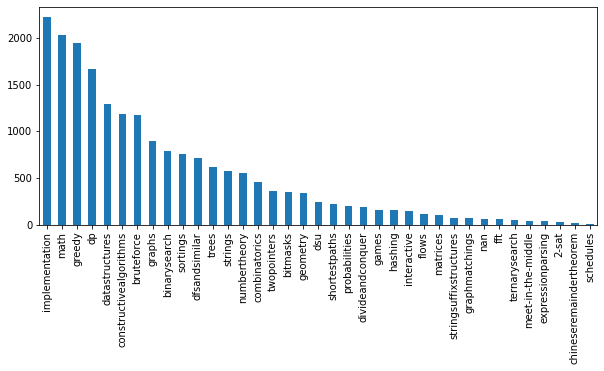

In [3]:
# tag stats
# https://stackoverflow.com/a/71887174/3413574
tag_stats = df["tags"].explode().value_counts()
tag_stats.plot(kind="bar", figsize=(10,4))
print(tag_stats.head(10))

In [4]:
clean_df = df[["problem_statement","tags"]]
clean_df.tail()

,problem_statement,tags
1271B,There are $$$n$$$ blocks arranged in a row and...,"[greedy, math]"
1271C,The map of the capital of Berland can be viewe...,"[bruteforce, geometry, greedy, implementation]"
1271D,"You play a strategic video game (yeah, we ran ...","[datastructures, dp, greedy, implementation, s..."
1271E,"At first, let's define function $$$f(x)$$$ as ...","[binarysearch, combinatorics, dp, math]"
1271F,Recently a lot of students were enrolled in Be...,[bruteforce]


## `Problem_statement`

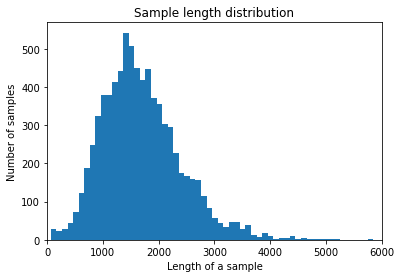

In [5]:
samples = df["problem_statement"].values

plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,6000)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [6]:
# !pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TreebankWordTokenizer

sample = clean_df["problem_statement"][len(clean_df)-1].lower()
sample[:500]

'recently a lot of students were enrolled in berland state university. all students were divided into groups according to their education program. some groups turned out to be too large to attend lessons in the same auditorium, so these groups should be divided into two subgroups. your task is to help divide the first-year students of the computer science faculty.\n\nthere are $$$t$$$ new groups belonging to this faculty. students have to attend classes on three different subjects — maths, programm'

In [7]:
# remove math stuff
# https://stackoverflow.com/a/171483/3413574
import re

def remove_mathjax(text):
    mathjax = "(\$\$\$(.*?)\$\$\$)"
    shortword = r"\W*\b\w{1,2}\b"
    return "".join(re.sub(mathjax," ",text))
# regex_pipeline = re.sub(shortword,"",regex_pipeline)
# print(regex_pipeline[:500])

from nltk.tokenize import wordpunct_tokenize
# tokenizer = TreebankWordTokenizer()

def remove_stopwords(text):
    return " ".join(wordpunct_tokenize(text))

# print(remove_mathjax(sample))
print(remove_stopwords(remove_mathjax(sample)))

recently a lot of students were enrolled in berland state university . all students were divided into groups according to their education program . some groups turned out to be too large to attend lessons in the same auditorium , so these groups should be divided into two subgroups . your task is to help divide the first - year students of the computer science faculty . there are new groups belonging to this faculty . students have to attend classes on three different subjects — maths , programming and p . e . all classes are held in different places according to the subject — maths classes are held in auditoriums , programming classes are held in computer labs , and p . e . classes are held in gyms . each group should be divided into two subgroups so that there is enough space in every auditorium , lab or gym for all students of the subgroup . for the first subgroup of the - th group , maths classes are held in an auditorium with capacity of students ; programming classes are held in 

In [8]:
try:
    stop_words = set(stopwords.words("english"))
except LookupError:
    nltk.download("stopwords","./data/nltk/")

def remove_shorts_stopwords(text, stop_words):
    result = []
    # for word in tokenizer.tokenize(regex_pipeline):
    for word in text.split():
        if len(word)>=3 and word not in stop_words:
            result.append(word)
    return " ".join(result)
    
print(remove_shorts_stopwords(remove_stopwords(remove_mathjax(sample)),stop_words))

recently lot students enrolled berland state university students divided groups according education program groups turned large attend lessons auditorium groups divided two subgroups task help divide first year students computer science faculty new groups belonging faculty students attend classes three different subjects maths programming classes held different places according subject maths classes held auditoriums programming classes held computer labs classes held gyms group divided two subgroups enough space every auditorium lab gym students subgroup first subgroup group maths classes held auditorium capacity students programming classes held lab accomodates students classes held gym enough place students analogically auditorium lab gym second subgroup accept students respectively usual students skip classes student considers number subjects useless means skips classes subjects attends classes data given follows group consists one type students attend classes obviously need place a

In [9]:
#stemming
x = (remove_shorts_stopwords(remove_stopwords(remove_mathjax(sample)),stop_words))

from nltk.stem.snowball import SnowballStemmer
def stemming(text):
    stemmer = SnowballStemmer("english")
    words = set()
    for word in text.split():
        stem = stemmer.stem(word)
        words.add(stem)
    return " ".join(words)

# train_data['Text'] = train_data['Text'].apply(lambda x: remove_stopwords(x))
# train_data['Text'] = train_data['Text'].apply(lambda x:clean_text(x))
# top 100 longest words
# print(stemming(remove_shorts_stopwords(remove_stopwords(remove_mathjax(sample)))))

In [10]:
# text preprocessing as function
def text_preprocess(text):
    """ preprocessing text 
    return processed text
    - text = text to process
    """
    text = remove_mathjax(text)
    text = remove_stopwords(text)
    text = stemming(text)
    # add more stopwords. (after having reviewed wordcloud...) 
    more_stopwords = set(["print","number","first","second","contain","case"])
    stop_words.update(more_stopwords)
    text = remove_shorts_stopwords(text,stop_words)
    return text

In [11]:
# preprocess for all df
clean_df["problem_statement"] = \
    clean_df["problem_statement"].apply(lambda x:text_preprocess(str(x)))

/tmp/ipykernel_978/1031663555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["problem_statement"] = \


In [12]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    clean_df, test_size=0.2, random_state=config.SEED)
print(train.shape, test.shape)
train.tail(3)

(6272, 2) (1568, 2)


,problem_statement,tags
339C,fourth type string line play pan sum lay avail...,"[constructivealgorithms, dfsandsimilar, dp, gr..."
909D,mani would string line etc need ani assign lef...,"[datastructures, greedy, implementation]"
582E,larg inform variabl space line valid count ::=...,"[bitmasks, dp, expressionparsing]"


implementation
math
greedy
dp
bruteforce
graphs
binarysearch


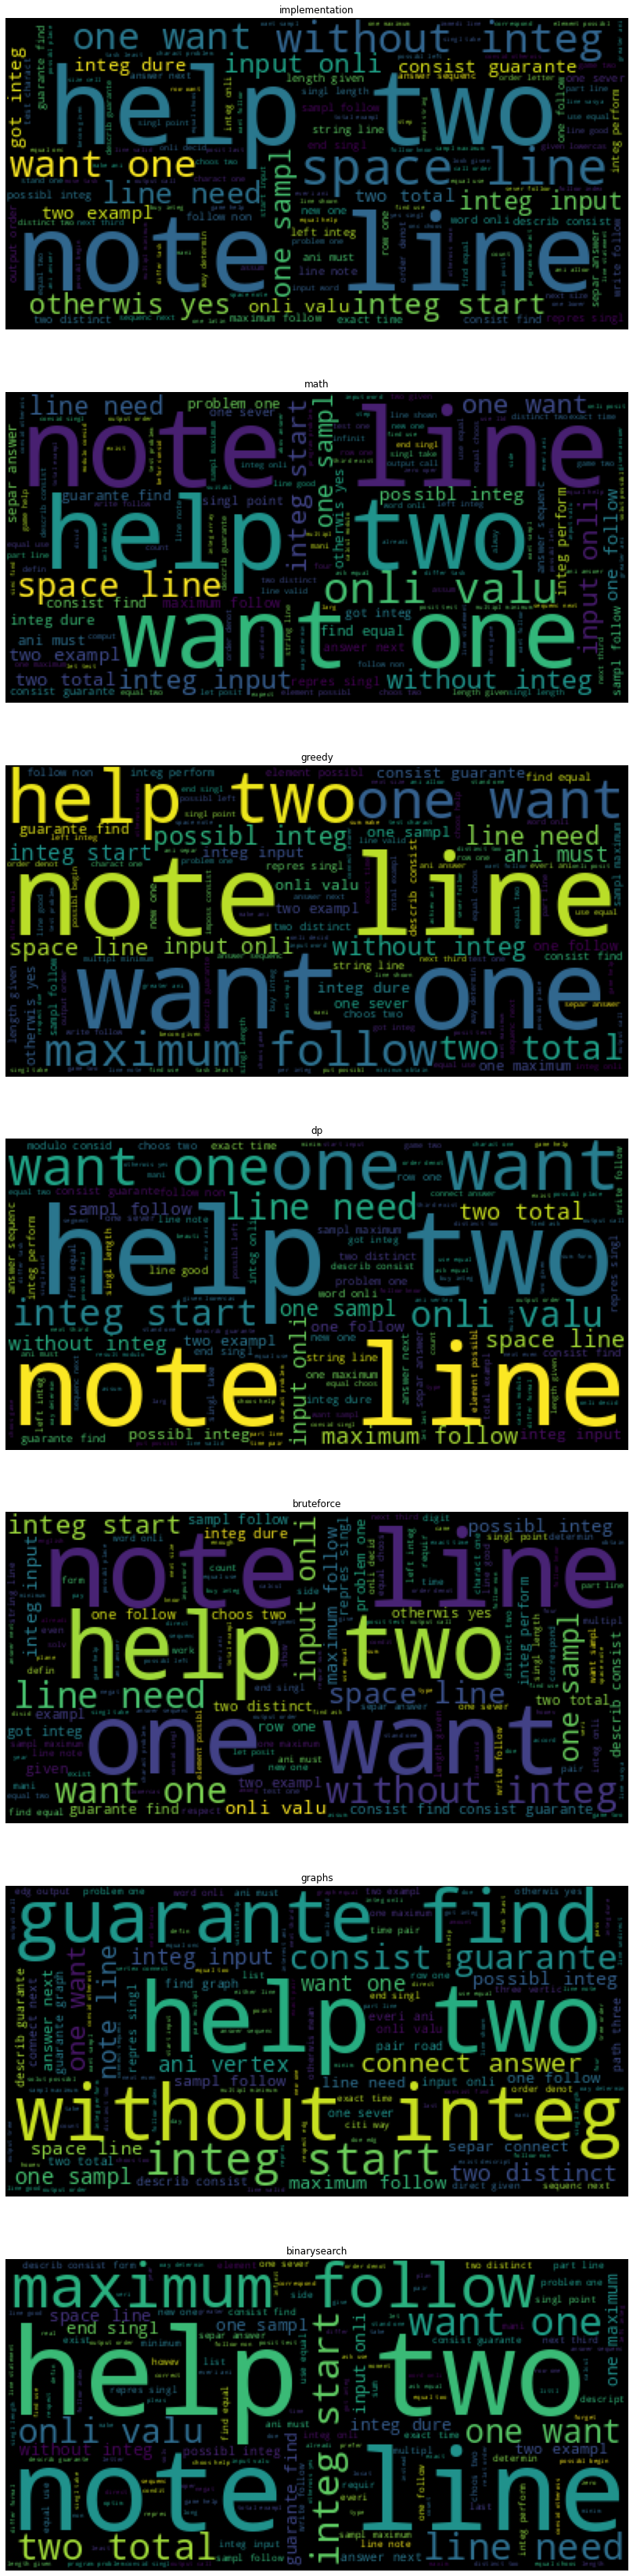

In [13]:
# wordcloud visualization
from wordcloud import WordCloud

def print_wordcloud(tag):
    text = ""
    for idx in train.index:
        if tag in train.loc[idx,"tags"]:
            text+=(str(train.loc[idx,"problem_statement"]))
    # print(dp_text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.title(tag)
    plt.imshow(wordcloud)
    plt.axis("off")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,60))
tags = "implementation math greedy dp bruteforce graphs binarysearch".split()
for i,tag in enumerate(tags):
    print(tag)
    plt.subplot(7,1,i+1)
    print_wordcloud(tag)

In [14]:
train.to_pickle(config.TRAIN)
test.to_pickle(config.TEST)

In [15]:
# !pip install wordcloud

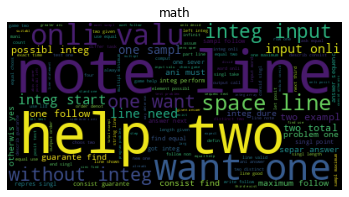

In [16]:
print_wordcloud("math")